In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pooldata=pd.read_csv('pool_data_202211111622.csv', sep=',')

In [3]:
pooldata.head()

,pool_id,time_stamp,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [4]:
pooldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43635 entries, 0 to 43634
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pool_id                43635 non-null  int64  
 1   time_stamp             43635 non-null  object 
 2   salinity               43604 non-null  float64
 3   flow switch            31 non-null     float64
 4   flow meter             0 non-null      float64
 5   turbidity              43604 non-null  float64
 6   ORP                    43635 non-null  float64
 7   PH                     43635 non-null  float64
 8   TDS                    43604 non-null  float64
 9   Pressure in tank       0 non-null      float64
 10  Pressure in            43604 non-null  float64
 11  Pressure out           43604 non-null  float64
 12  Pump RPM               0 non-null      float64
 13  pump current           43604 non-null  float64
 14  dis_feeder             0 non-null      float64
 15  ph

# Explanation of the terms

### Non-Null Term

pool_id: id of the pool

time_stamp: the time in which the data is recorded

salinity: the amount of salt dissolved in the water (g/kg in ppm)

turbidity: measure of relative clarity of water (NTU)

ORP: oxidation-reduction potential (mV)

pH: acidity measurement (pH)

TDS: total dissolved solid (mg/L in ppm)

Pressure in: pressure measurement near the water inlet (probably in bar)

Pressure out: pressure measurement near the water outlet (probably in bar)

Pump current: 

Human Counter: 

temperature: temperature in the pool (in F)

water level: level of water

### Non-Null Term but are mostly 0

Fresh water:

Drain:

### Null Term 

flow_switch: signal indicating water flow

flow meter: the amount of water flow

pressure in tank: pressure inside the pool (probably bar)

Pump RPM: Rotation speed of pump (Rotation Per Minute)

dis_feeder

ph_feeder

Shw msg

cppm 

phfeedtime

orpfeedtime

bather in from mens

bather in from ladies

# Basic Criteria

I don't fully know the criteria to keep a pool clean. I click on the link on our group Google Doc about the CDC guidelines and found these two requirements that I think we can work on.

CDC requirements:

    Maintain free chlorine levels continuously between 1–3 parts per million.

    Maintain the pH level of the water at 7.2–7.8.

There are probably more requirements. But I think we can first check the pH of the pool to see if it fits the requirement.

<AxesSubplot:>

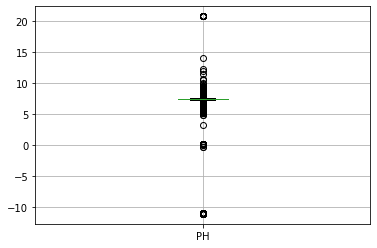

In [5]:
pooldata[['PH']].boxplot()

As you can see, the range in which the pH indicator varies quite a lot. It's difficult to say if this instrument error or that the pool is very poorly managed. I think there's probably some instrument error here because -10 to 0 pH is just unrealistic. At this point, your body will be burned by acid already. The majority of the pH data seems close to 7 so that's good. I'll check the histogram to see how it's distributed.

<AxesSubplot:>

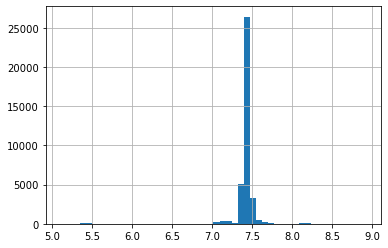

In [6]:
pooldata.loc[(pooldata['PH']<9) & (pooldata['PH']>5),'PH'].hist( bins=50)

In [7]:
pooldata.loc[(pooldata['PH']<9) & (pooldata['PH']>5),'PH'].describe()

count    37147.000000
mean         7.419715
std          0.173115
min          5.113690
25%          7.401170
50%          7.425220
75%          7.454340
max          8.914570
Name: PH, dtype: float64

Overall, we will need more information on the critaria of keeping the pool clean and the cost of them to make the project forward.

# Time Series

Here I plot the non-null data with time to see how they vary during the week.

In [8]:
pooldata['time_stamp']=pd.to_datetime(pooldata['time_stamp'],format='%Y-%m-%d %H:%M:%S')

In [9]:
colume=['salinity','turbidity','ORP','PH','TDS','Pressure in','Pressure in','Pressure out','pump current','Human Counter','temperature','water level']

In [10]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'time_stamp', y = col, data=pooldata, alpha=0.5)
        ax.set(xlabel='time_stamp', ylabel=col)
        ax.tick_params(axis='x', labelrotation=45)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

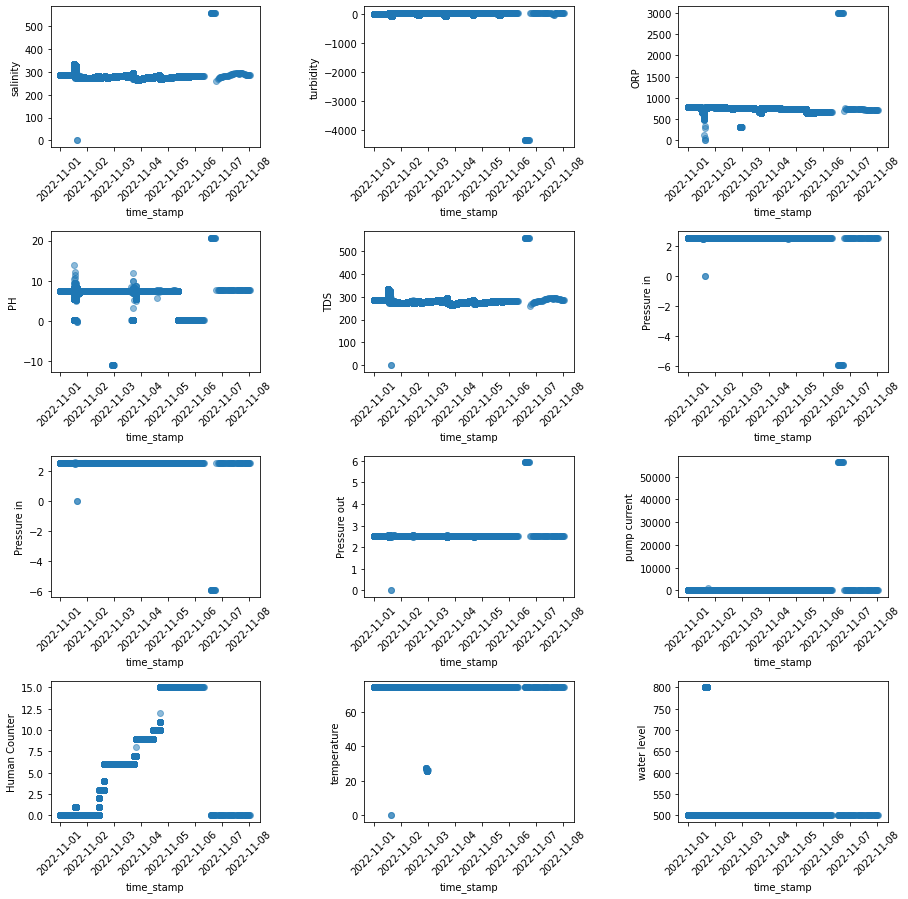

In [11]:
scatterplots(colume, ncol=3, figsize=(15, 15))

The signal is quite static across a week. I think if possible we should ask for more information about when new chemical is added into the pool. I think this information is supposed to be on the "phfeedtime" and "orpfeedtime". Unfortunately, we don't have any data in these columns for this pool.